# Predição de Preços

Nesse projeto iremos predizer o preço de veículos com base em suas características (features). Utilizaremos algoritmos de regressão para encontrar o melhor modelo preditivo.

A base de dados será retirada do Kaggle.

O intuito é criar uma aplicação para uma loja de veículos. Além da intuição e pesquisa de mercado, é importante para os vendedores terem uma ferramenta automatizada de predição para terem um indicador confiável de qual preço devem vender os veículos.

In [1]:
# Importando os pacotes necessários para manipulação e visualização de dados:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Importanto tudo o necessário dentro do pacote scikit-learn:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [5]:
# Configurando o pandas para mostrar todas as linhas e colunas:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Configurando o pandas para não mostrar a notação científica:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
# Carregando a base de dados:
carros = pd.read_csv('C:\\data_science\\projeto-predicao-precos-veiculos\\cardekho_imputated.csv')
carros.head()

,Unnamed: 0,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,711000.00,748000.00,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,854082.87,1307925.56,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,1014000.00,1379000.00,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [9]:
carros.shape

(15411, 16)

Temos então 15.411 carros na nossa base de dados.

A primeira coluna pode ser removida, ou transformada em índice. A última coluna (selling_price) é a nossa variável <b>target</b>, ou seja, a variável que queremos prever. Logo teremos ao todo 14 features para ajudar o nosso modelo preditivo.

As features <i>engine</i> e <i>mileage</i> são as cilindradas do motor e o consumo em km/litro, respectivamente.

In [11]:
# Eliminando a primeira coluna:
carros = carros.drop(carros.columns[0], axis=1)
carros.head()

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,711000.00,748000.00,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,854082.87,1307925.56,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,1014000.00,1379000.00,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [13]:
carros.shape

(15411, 15)

Como nossa target é um número real (ou seja, variável numérica e contínua), iremos modelá-la como uma <b> regressão </b>.

In [15]:
carros['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

Dicionário:
1. Petrol = Gasolina
2. Diesel = Diesel
3. CNG = GNV (Gás Natural Veicular)
4. LPG = GLP (Gás Liquefeito de Petróleo)
5. Eletric = Elétrico

In [17]:
# Informações básicas das features:
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   min_cost_price     15411 non-null  float64
 4   max_cost_price     15411 non-null  float64
 5   vehicle_age        15411 non-null  int64  
 6   km_driven          15411 non-null  int64  
 7   seller_type        15411 non-null  object 
 8   fuel_type          15411 non-null  object 
 9   transmission_type  15411 non-null  object 
 10  mileage            15411 non-null  float64
 11  engine             15411 non-null  int64  
 12  max_power          15411 non-null  float64
 13  seats              15411 non-null  int64  
 14  selling_price      15411 non-null  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 1.8+ MB


Temos muitas variáveis do tipo object, que precisarão ser codificadas (transformadas em números) antes de criarmos os modelos preditivos.

In [19]:
# Verificando se existem dados faltantes:
carros.isnull().sum()

car_name             0
brand                0
model                0
min_cost_price       0
max_cost_price       0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

Excelente! Não existem dados faltantes, logo não será necessário o tratamento de <i>missing data</i>.

In [21]:
# Distribuição das variáveis categóricas (exceto o nome do veículo):
print(carros['fuel_type'].value_counts())
print(carros['seller_type'].value_counts())
print(carros['transmission_type'].value_counts())
print(carros['brand'].value_counts())
print(carros['model'].value_counts())

fuel_type
Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: count, dtype: int64
seller_type
Dealer              9539
Individual          5699
Trustmark Dealer     173
Name: count, dtype: int64
transmission_type
Manual       12225
Automatic     3186
Name: count, dtype: int64
brand
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce       

In [23]:
# Conhecendo os parâmetros estatísticos dos dados (features numéricas):
carros.describe()

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00
mean,5892971.12,1962623.92,6.04,55616.48,19.70,1486.06,100.59,5.33,774971.12
std,56698513.93,2889635.64,3.01,51618.55,4.17,521.11,42.97,0.81,894128.36
min,311000.00,436000.00,0.00,100.00,4.00,793.00,38.40,0.00,40000.00
25%,668000.00,872866.67,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,855000.00,1206000.00,6.00,50000.00,19.67,1248.00,88.50,5.00,556000.00
75%,1284000.00,1743000.00,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00
max,988000000.00,91100000.00,29.00,3800000.00,33.54,6592.00,626.00,9.00,39500000.00


In [25]:
colunas_precos = [coluna for coluna in carros.columns if 'price' in coluna]
colunas_precos

['min_cost_price', 'max_cost_price', 'selling_price']

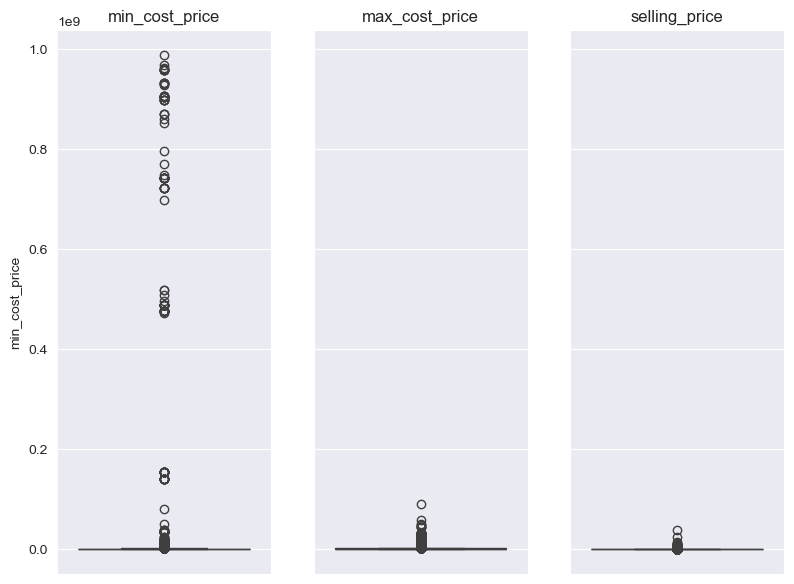

In [27]:
# Vamos plotar um boxplot das variáveis de preço, para verificar existência de outliers:
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 3, sharey=True, figsize=(8,6))
plt.tight_layout()

#Plotando 1 boxplot por feature:
for i in range(3):
    coluna_1 = colunas_precos[i]
    sns.boxplot(data=carros, y=coluna_1, ax=graficos[i])
    graficos[i].set_title(coluna_1)

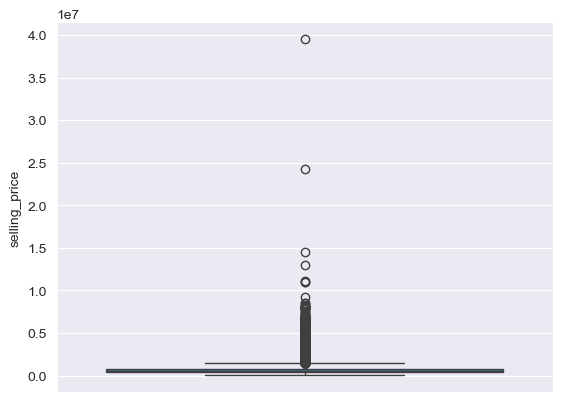

In [29]:
# Vamos verificar apenas o boxplot da nossa variável target:
sns.set_style("darkgrid")
sns.boxplot(data=carros, y=carros['selling_price'])
plt.show()

Os boxplots não ajudaram a visualização.

In [31]:
# Verificando via describe:
carros['selling_price'].describe(percentiles=[.9])

count      15411.00
mean      774971.12
std       894128.36
min        40000.00
50%       556000.00
90%      1375000.00
max     39500000.00
Name: selling_price, dtype: float64

Ou seja, 90% dos carros são vendidos a menos de 1.375.00,00. Temos porém, um máximo de 39.500.000,00 que representa nosso maior outlier.

In [33]:
carros['selling_price'].describe()

count      15411.00
mean      774971.12
std       894128.36
min        40000.00
25%       385000.00
50%       556000.00
75%       825000.00
max     39500000.00
Name: selling_price, dtype: float64

In [35]:
# Calculando intervalo interquartilico:
iil = 825000.00 - 385000.00

# Calculando os outliers inferiores e superiores:
outlier_abaixo = 385000.00 - (1.5*iil)
outlier_acima = 825000.00 + (1.5*iil)

iil, outlier_abaixo, outlier_acima

(440000.0, -275000.0, 1485000.0)

Logo não temos outliers para baixo, apenas carros vendidos por mais de 1.485.000.00.

Vamos retirar esses outiers para melhorar nosso modelo.

In [37]:
carros_outliers = carros.loc[carros['selling_price'] > outlier_acima]
carros_outliers.head()

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
12,Mini Cooper,Mini,Cooper,4238800.00,5239200.00,4,6000,Dealer,Petrol,Automatic,14.41,1998,189.08,5,3250000
58,Mahindra XUV500,Mahindra,XUV500,1654000.00,2328000.00,3,21500,Individual,Diesel,Automatic,15.10,2179,152.87,7,1650000
111,BMW 5,BMW,5,7440307.69,8352307.69,5,63000,Dealer,Diesel,Automatic,18.59,2993,261.49,5,2600000
129,Ford Endeavour,Ford,Endeavour,3627000.00,4273000.00,3,11387,Individual,Diesel,Automatic,10.91,3198,197.00,7,2900000
139,BMW 3,BMW,3,5124421.49,5811851.24,5,68000,Dealer,Diesel,Automatic,22.69,1995,190.00,5,2090000


In [39]:
carros_outliers.shape

(1386, 15)

In [41]:
n_outliers = (1386/15411)*100
n_outliers

8.993576017130621

Temos então que quase 9% dos veículos são outliers. Vamos guardar essas informações e depois refazer os modelos retirando os outliers e ver se conseguimos melhorar nosso modelo preditivo.

C:\Users\rhyan\AppData\Local\Temp\ipykernel_27780\11015301.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(carros['selling_price'])


<Axes: xlabel='selling_price', ylabel='Density'>

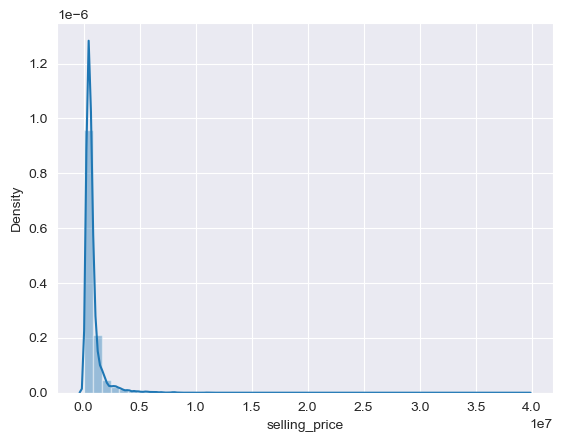

In [43]:
# Plotando uma distribuição do preço de venda:
sns.distplot(carros['selling_price'])

C:\Users\rhyan\AppData\Local\Temp\ipykernel_27780\3577175401.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(carros_sem_outliers['selling_price'])


<Axes: xlabel='selling_price', ylabel='Density'>

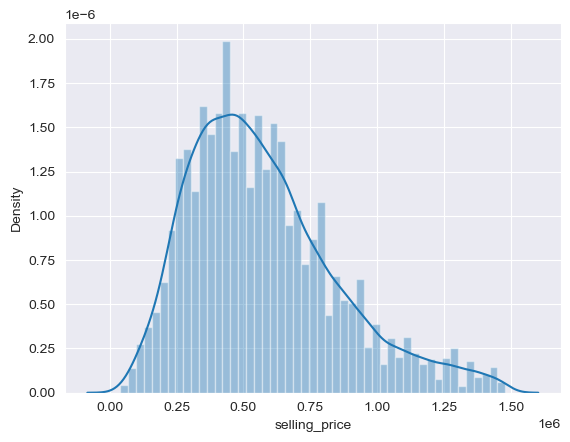

In [45]:
# Vamos plotar agora sem os outliers para ver como fica mais fácil de entender:
carros_sem_outliers = carros.loc[carros['selling_price'] < outlier_acima]
sns.distplot(carros_sem_outliers['selling_price'])

Percebe-se que os outliers contaminam o gráfico de densidade.

Ainda temos 4 variáveis que precisam ser codificadas: brand, seller_type, fuel_type e transmission_type.

## Codificando as features categóricas

In [47]:
carros['brand'].unique()

array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes-Benz',
       'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata',
       'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu',
       'Porsche', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Maserati',
       'Bentley', 'Nissan', 'ISUZU', 'Ferrari', 'Mercedes-AMG',
       'Rolls-Royce', 'Force'], dtype=object)

In [49]:
carros['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [51]:
carros['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [53]:
carros['transmission_type'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [55]:
# Podemos apenas mapear a feature transmission_type:
carros['automatic'] = carros['transmission_type'].map({'Automatic': 1, 'Manual': 0})
carros.head()

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,automatic
0,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,0
1,Hyundai Grand,Hyundai,Grand,711000.00,748000.00,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,0
2,Hyundai i20,Hyundai,i20,854082.87,1307925.56,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,0
3,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,0
4,Ford Ecosport,Ford,Ecosport,1014000.00,1379000.00,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,0


In [57]:
carros['transmission_type'].value_counts()

transmission_type
Manual       12225
Automatic     3186
Name: count, dtype: int64

In [59]:
carros['automatic'].value_counts()

automatic
0    12225
1     3186
Name: count, dtype: int64

In [61]:
# Como confirmamos a substituição, podemos eliminar a coluna transmission_type:
carros = carros.drop('transmission_type', axis=1)
carros.head()

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,mileage,engine,max_power,seats,selling_price,automatic
0,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,120000,Individual,Petrol,19.70,796,46.30,5,120000,0
1,Hyundai Grand,Hyundai,Grand,711000.00,748000.00,5,20000,Individual,Petrol,18.90,1197,82.00,5,550000,0
2,Hyundai i20,Hyundai,i20,854082.87,1307925.56,11,60000,Individual,Petrol,17.00,1197,80.00,5,215000,0
3,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,37000,Individual,Petrol,20.92,998,67.10,5,226000,0
4,Ford Ecosport,Ford,Ecosport,1014000.00,1379000.00,6,30000,Dealer,Diesel,22.77,1498,98.59,5,570000,0


In [63]:
# Vamos agora usar o One Hot Encoding para as demais features categóricas
# Começando com seller_type
colunas_vendedor = pd.get_dummies(carros['seller_type'], drop_first=True, dtype=int)
colunas_vendedor.head()

,Individual,Trustmark Dealer
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0


In [65]:
# Concatenando no dataframe original:
carros = pd.concat([carros, colunas_vendedor],axis = 1)
carros.head()

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,mileage,engine,max_power,seats,selling_price,automatic,Individual,Trustmark Dealer
0,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,120000,Individual,Petrol,19.70,796,46.30,5,120000,0,1,0
1,Hyundai Grand,Hyundai,Grand,711000.00,748000.00,5,20000,Individual,Petrol,18.90,1197,82.00,5,550000,0,1,0
2,Hyundai i20,Hyundai,i20,854082.87,1307925.56,11,60000,Individual,Petrol,17.00,1197,80.00,5,215000,0,1,0
3,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,37000,Individual,Petrol,20.92,998,67.10,5,226000,0,1,0
4,Ford Ecosport,Ford,Ecosport,1014000.00,1379000.00,6,30000,Dealer,Diesel,22.77,1498,98.59,5,570000,0,0,0


In [67]:
# Vamos agora dropar a feature original:
carros = carros.drop('seller_type', axis=1)
carros.head()

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,fuel_type,mileage,engine,max_power,seats,selling_price,automatic,Individual,Trustmark Dealer
0,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,120000,Petrol,19.70,796,46.30,5,120000,0,1,0
1,Hyundai Grand,Hyundai,Grand,711000.00,748000.00,5,20000,Petrol,18.90,1197,82.00,5,550000,0,1,0
2,Hyundai i20,Hyundai,i20,854082.87,1307925.56,11,60000,Petrol,17.00,1197,80.00,5,215000,0,1,0
3,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,37000,Petrol,20.92,998,67.10,5,226000,0,1,0
4,Ford Ecosport,Ford,Ecosport,1014000.00,1379000.00,6,30000,Diesel,22.77,1498,98.59,5,570000,0,0,0


In [69]:
# Fazendo o mesmo para a feature: fuel_type
colunas_combustivel = pd.get_dummies(carros['fuel_type'], drop_first=True, dtype=int)
colunas_combustivel.head()

,Diesel,Electric,LPG,Petrol
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0


In [71]:
# Concatenando no dataframe original e dropando a feature original:
carros = pd.concat([carros, colunas_combustivel],axis = 1)
carros = carros.drop('fuel_type', axis=1)
carros.head()

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,automatic,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol
0,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,120000,19.70,796,46.30,5,120000,0,1,0,0,0,0,1
1,Hyundai Grand,Hyundai,Grand,711000.00,748000.00,5,20000,18.90,1197,82.00,5,550000,0,1,0,0,0,0,1
2,Hyundai i20,Hyundai,i20,854082.87,1307925.56,11,60000,17.00,1197,80.00,5,215000,0,1,0,0,0,0,1
3,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,37000,20.92,998,67.10,5,226000,0,1,0,0,0,0,1
4,Ford Ecosport,Ford,Ecosport,1014000.00,1379000.00,6,30000,22.77,1498,98.59,5,570000,0,0,0,1,0,0,0


In [73]:
# Fazendo o mesmo para a feature: brand
colunas_marca = pd.get_dummies(carros['brand'], drop_first=True, dtype=int)
colunas_marca.head()

,BMW,Bentley,Datsun,Ferrari,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Kia,Land Rover,Lexus,MG,Mahindra,Maruti,Maserati,Mercedes-AMG,Mercedes-Benz,Mini,Nissan,Porsche,Renault,Rolls-Royce,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
# Concatenando no dataframe original e dropando a feature original:
carros = pd.concat([carros, colunas_marca],axis = 1)
carros = carros.drop('brand', axis=1)
carros.head()

,car_name,model,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,automatic,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,BMW,Bentley,Datsun,Ferrari,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Kia,Land Rover,Lexus,MG,Mahindra,Maruti,Maserati,Mercedes-AMG,Mercedes-Benz,Mini,Nissan,Porsche,Renault,Rolls-Royce,Skoda,Tata,Toyota,Volkswagen,Volvo
0,Maruti Alto,Alto,357003.86,465401.54,9,120000,19.70,796,46.30,5,120000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hyundai Grand,Grand,711000.00,748000.00,5,20000,18.90,1197,82.00,5,550000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyundai i20,i20,854082.87,1307925.56,11,60000,17.00,1197,80.00,5,215000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Maruti Alto,Alto,357003.86,465401.54,9,37000,20.92,998,67.10,5,226000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ford Ecosport,Ecosport,1014000.00,1379000.00,6,30000,22.77,1498,98.59,5,570000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
# Dropando as colunas de nome e modelo:
carros = carros.drop('car_name', axis=1)
carros = carros.drop('model', axis=1)
carros.head()

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,automatic,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,BMW,Bentley,Datsun,Ferrari,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Kia,Land Rover,Lexus,MG,Mahindra,Maruti,Maserati,Mercedes-AMG,Mercedes-Benz,Mini,Nissan,Porsche,Renault,Rolls-Royce,Skoda,Tata,Toyota,Volkswagen,Volvo
0,357003.86,465401.54,9,120000,19.70,796,46.30,5,120000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,711000.00,748000.00,5,20000,18.90,1197,82.00,5,550000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,854082.87,1307925.56,11,60000,17.00,1197,80.00,5,215000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,357003.86,465401.54,9,37000,20.92,998,67.10,5,226000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1014000.00,1379000.00,6,30000,22.77,1498,98.59,5,570000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   min_cost_price    15411 non-null  float64
 1   max_cost_price    15411 non-null  float64
 2   vehicle_age       15411 non-null  int64  
 3   km_driven         15411 non-null  int64  
 4   mileage           15411 non-null  float64
 5   engine            15411 non-null  int64  
 6   max_power         15411 non-null  float64
 7   seats             15411 non-null  int64  
 8   selling_price     15411 non-null  int64  
 9   automatic         15411 non-null  int64  
 10  Individual        15411 non-null  int32  
 11  Trustmark Dealer  15411 non-null  int32  
 12  Diesel            15411 non-null  int32  
 13  Electric          15411 non-null  int32  
 14  LPG               15411 non-null  int32  
 15  Petrol            15411 non-null  int32  
 16  BMW               15411 non-null  int32 

Apesar de aumentarmos a dimensionalidade da nossa base de dados (nº de features), temos agora todas elas codificadas (numéricas). E agora podemos começar a trabalhar com os modelos preditivos.

# Machine Learning

## Determinando a variável <i>Target</i> e as <i>Features</i>

In [81]:
X = carros.drop('selling_price', axis=1)
y = carros['selling_price']

X.shape, y.shape

((15411, 46), (15411,))

In [83]:
X.head()

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,automatic,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,BMW,Bentley,Datsun,Ferrari,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Kia,Land Rover,Lexus,MG,Mahindra,Maruti,Maserati,Mercedes-AMG,Mercedes-Benz,Mini,Nissan,Porsche,Renault,Rolls-Royce,Skoda,Tata,Toyota,Volkswagen,Volvo
0,357003.86,465401.54,9,120000,19.70,796,46.30,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,711000.00,748000.00,5,20000,18.90,1197,82.00,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,854082.87,1307925.56,11,60000,17.00,1197,80.00,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,357003.86,465401.54,9,37000,20.92,998,67.10,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1014000.00,1379000.00,6,30000,22.77,1498,98.59,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
y.head()

0    120000
1    550000
2    215000
3    226000
4    570000
Name: selling_price, dtype: int64

## Separação de Bases

Para evitar data leakage precisamos separar a base de dados em: treino e teste; antes de começar qualquer manipulação dos dados. A validação será feita utilizando cross validation.

In [87]:
# Separando as bases em: 80% para treino dos modelos e 20% para teste
# Validação será feita com cross validation
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=.2, random_state=42)
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((12328, 46), (3083, 46), (12328,), (3083,))

Agora trabalharemos apenas com a base de treino!

## <i>Feature Scaling</i>

Vamos verificar se as escalas estão muito diferentes e, se positivo, iremos traze-las para a mesma escala. Isso também ajuda os modelos preditivos.

In [89]:
# Verificando as grandezaz:
carros.describe()

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,automatic,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,BMW,Bentley,Datsun,Ferrari,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Kia,Land Rover,Lexus,MG,Mahindra,Maruti,Maserati,Mercedes-AMG,Mercedes-Benz,Mini,Nissan,Porsche,Renault,Rolls-Royce,Skoda,Tata,Toyota,Volkswagen,Volvo
count,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00
mean,5892971.12,1962623.92,6.04,55616.48,19.70,1486.06,100.59,5.33,774971.12,0.21,0.37,0.01,0.48,0.00,0.00,0.50,0.03,0.00,0.01,0.00,0.00,0.05,0.10,0.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.32,0.00,0.00,0.02,0.00,0.00,0.00,0.03,0.00,0.02,0.03,0.05,0.04,0.00
std,56698513.93,2889635.64,3.01,51618.55,4.17,521.11,42.97,0.81,894128.36,0.40,0.48,0.11,0.50,0.02,0.05,0.50,0.17,0.01,0.10,0.01,0.01,0.22,0.30,0.40,0.01,0.02,0.06,0.05,0.05,0.06,0.03,0.04,0.25,0.47,0.01,0.01,0.15,0.03,0.03,0.04,0.18,0.01,0.15,0.16,0.22,0.20,0.04
min,311000.00,436000.00,0.00,100.00,4.00,793.00,38.40,0.00,40000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,668000.00,872866.67,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,855000.00,1206000.00,6.00,50000.00,19.67,1248.00,88.50,5.00,556000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1284000.00,1743000.00,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,988000000.00,91100000.00,29.00,3800000.00,33.54,6592.00,626.00,9.00,39500000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Percebe-se que as colunas contendo preços estão com uma grandeza muito superior as demais. Vamos arrumar isso.

In [91]:
# Vamos normalizar as features utilizando o MinMaxScaler:
from sklearn.preprocessing import MinMaxScaler

# Criando o scaler:
scaler = MinMaxScaler()

In [93]:
type(scaler)

sklearn.preprocessing._data.MinMaxScaler

In [95]:
# Separando as colunas:
colunas = X_treino.columns

# Faremos o Fit/Transform onde:
    # Fit será feito na base de treino: colocando tudo entre 0 e 1
    # Transform será feito na base de teste: podemos ter acima de 1 e/ou abaixo de 0
scaler.fit(X_treino)

# Transformando os dados:
X_treino = pd.DataFrame(scaler.transform(X_treino), columns=colunas, index=X_treino.index)
X_teste = pd.DataFrame(scaler.transform(X_teste), columns=colunas, index=X_teste.index)

X_treino.shape, X_teste.shape

((12328, 46), (3083, 46))

In [97]:
X_treino.head()

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,automatic,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,BMW,Bentley,Datsun,Ferrari,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Kia,Land Rover,Lexus,MG,Mahindra,Maruti,Maserati,Mercedes-AMG,Mercedes-Benz,Mini,Nissan,Porsche,Renault,Rolls-Royce,Skoda,Tata,Toyota,Volkswagen,Volvo
11210,0.01,0.07,0.24,0.05,0.24,0.28,0.30,0.56,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1347,0.00,0.00,0.07,0.01,0.67,0.07,0.08,0.56,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
10363,0.01,0.11,0.07,0.00,0.51,0.20,0.35,0.56,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
316,0.00,0.01,0.24,0.05,0.47,0.12,0.13,0.56,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10638,0.00,0.00,0.34,0.06,0.55,0.07,0.07,0.56,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [99]:
X_teste.head()

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,automatic,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,BMW,Bentley,Datsun,Ferrari,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Kia,Land Rover,Lexus,MG,Mahindra,Maruti,Maserati,Mercedes-AMG,Mercedes-Benz,Mini,Nissan,Porsche,Renault,Rolls-Royce,Skoda,Tata,Toyota,Volkswagen,Volvo
3334,0.00,0.00,0.41,0.05,0.55,0.07,0.07,0.56,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10928,0.00,0.01,0.14,0.04,0.79,0.08,0.06,0.56,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2518,0.00,0.01,0.24,0.07,0.57,0.08,0.09,0.78,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
11322,0.00,0.01,0.03,0.00,0.49,0.12,0.14,0.56,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9394,0.00,0.00,0.38,0.05,0.53,0.00,0.01,0.56,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Analisando a Correlação entre as Features

É interessante verificar se as features possuem alguma relação umas com as outras. Caso exista, talvez seja necessário remover uma das features para não afetar o modelo.

In [101]:
import numpy as np

<Axes: >

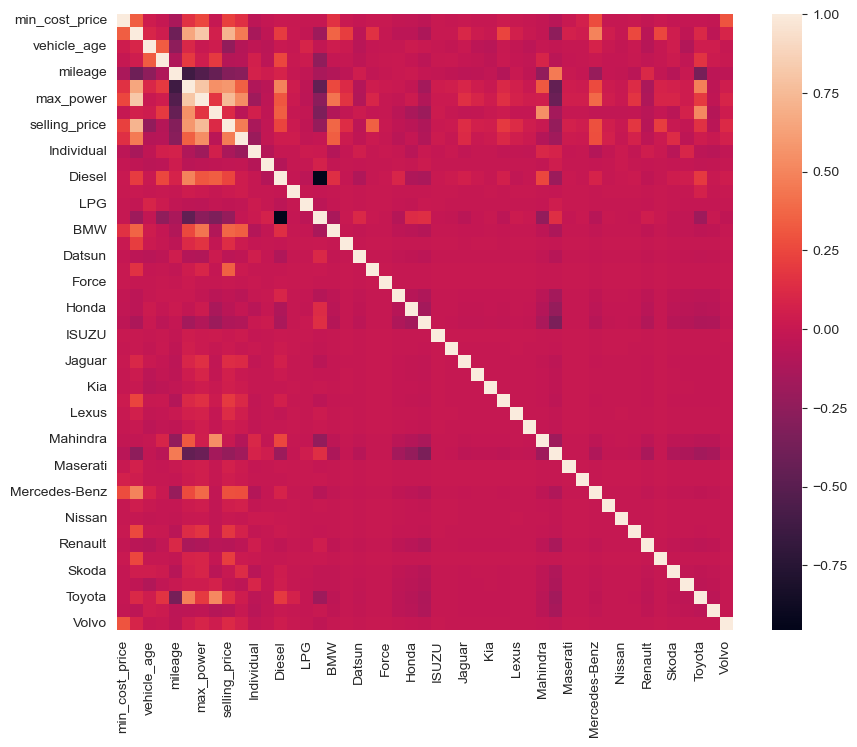

In [103]:
# Vamos plotar um mapa de calor da Correlação:
figura, graficos = plt.subplots(figsize=(10,8))
correlacao = carros.corr()
sns.heatmap(correlacao, mask=np.zeros_like(correlacao, dtype=bool), square=True, ax=graficos)

Parece existir uma correlação do preço de venda com max_power e engine. O que faz sentido.

E aparentemente carros Mahindra possuem correlação com preço de venda e engine. Porém, não será necessário remover nenhuma feature.

In [105]:
# Verificando novamente a existência de missing data:
carros.isnull().sum()

min_cost_price      0
max_cost_price      0
vehicle_age         0
km_driven           0
mileage             0
engine              0
max_power           0
seats               0
selling_price       0
automatic           0
Individual          0
Trustmark Dealer    0
Diesel              0
Electric            0
LPG                 0
Petrol              0
BMW                 0
Bentley             0
Datsun              0
Ferrari             0
Force               0
Ford                0
Honda               0
Hyundai             0
ISUZU               0
Isuzu               0
Jaguar              0
Jeep                0
Kia                 0
Land Rover          0
Lexus               0
MG                  0
Mahindra            0
Maruti              0
Maserati            0
Mercedes-AMG        0
Mercedes-Benz       0
Mini                0
Nissan              0
Porsche             0
Renault             0
Rolls-Royce         0
Skoda               0
Tata                0
Toyota              0
Volkswagen

Não precisamos fazer tratamento de missing data. Que deveria ser feito aqui, após separar as bases.

## Criando os Modelos

O primeiro modelo a ser treinado é a <b>REGRESSÃO LINEAR</b>. Vamos usar o <i>cross validation</i> para evitar overfit e aproveitar melhor a nossa base de dados.

In [107]:
# Criando o modelo/algoritmo:
regressao_linear = LinearRegression()

# Treinando com o cross validation em 10 folds
# Métrica: Root Mean Squared Error
valores_rmse_r1 = cross_val_score(estimator=regressao_linear, X=X_treino, y=y_treino, cv=10, scoring='neg_root_mean_squared_error')
valores_rmse_r1

array([ -458050.05861557,  -405976.55890504,  -377107.5170359 ,
       -1013561.9315502 ,  -390135.12481916,  -415035.46435291,
        -401144.33961765,  -433118.53690532,  -424353.4727566 ,
        -620367.60234404])

In [109]:
# Eliminando o sinal negativo e calculando a média:
valores_rmse_r1 = valores_rmse_r1*(-1)
media_rmse_r1 = valores_rmse_r1.mean()
media_rmse_r1

493885.06069023756

Isso significa que estamos errando nossas predições em 493.885,06 nos preços (em RUPIAS) dos veículos.
Em reais seria R$ 32.477,88, um valor consideravelmente alto!
Uma possível causa: <b>não removemos os outliers</b>

Vamos testar agora o <b>ÁRVORE DE REGRESSÃO</b> e ver se melhoramos esse erro.

In [111]:
from sklearn.tree import DecisionTreeRegressor

In [113]:
# Criando o modelo:
arvore_regressao = DecisionTreeRegressor()

# Treinando com o cross validatiom em 10 folds:
valores_rmse_arvore = cross_val_score(estimator=arvore_regressao, X=X_treino, y=y_treino, cv=10, scoring='neg_root_mean_squared_error')
valores_rmse_arvore

array([-255958.54281028, -394398.66812556, -257008.61781637,
       -759626.9107877 , -308888.54544995, -227351.082655  ,
       -205544.28340896, -288173.14744593, -291016.87994066,
       -488515.65526569])

In [115]:
# Eliminando o sinal negativo e calculando a média:
valores_rmse_arvore = valores_rmse_arvore*(-1)
media_rmse_arvore = valores_rmse_arvore.mean()
media_rmse_arvore

347648.23337060894

Tivemos uma melhora considerável com a Árvore de Regreesão:
- Regressão Linear: 493.885,06 (rupias indianas) 32.477,88 (reais)
- Árvore de Regressão: 347.648,23 (rupias indianas) 22.871,78

Porém, esse erro ainda é excessivamente alto. Não vamos continuar com o treino, pois nenhum desses modelos pode ser considerado campeão. Vamos remover os outliers e repetir todos os passos até a criação de novos modelos.

## Removendo os <i>Outliers</i>

In [118]:
carros_2 = pd.read_csv('C:\\data_science\\projeto-predicao-precos-veiculos\\cardekho_imputated.csv')
carros_2.head()

,Unnamed: 0,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,711000.00,748000.00,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,854082.87,1307925.56,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,1014000.00,1379000.00,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [120]:
carros_2.columns

Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'min_cost_price',
       'max_cost_price', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [122]:
# Dropando todas as features que não usaremos:
carros_2 = carros_2.drop(['Unnamed: 0', 'car_name', 'model'], axis=1)
carros_2.head()

,brand,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,357003.86,465401.54,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai,711000.00,748000.00,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai,854082.87,1307925.56,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti,357003.86,465401.54,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford,1014000.00,1379000.00,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [124]:
carros_2['selling_price'].describe()

count      15411.00
mean      774971.12
std       894128.36
min        40000.00
25%       385000.00
50%       556000.00
75%       825000.00
max     39500000.00
Name: selling_price, dtype: float64

In [126]:
# Calculando intervalo interquartilico:
iil = 825000.00 - 385000.00

# Calculando os outliers inferiores e superiores:
outlier_abaixo = 385000.00 - (1.5*iil)
outlier_acima = 825000.00 + (1.5*iil)

iil, outlier_abaixo, outlier_acima

(440000.0, -275000.0, 1485000.0)

Logo, só precisamos remover outliers acima, não existem carros sendo vendidos a preços negativos.

In [130]:
# Removendo os outliers:
carros_2 = carros_2.loc[carros_2['selling_price'] < outlier_acima]
carros_2.shape

(14023, 13)

In [132]:
carros_2['selling_price'].describe()

count     14023.00
mean     573685.65
std      278186.64
min       40000.00
25%      368000.00
50%      525000.00
75%      725000.00
max     1480000.00
Name: selling_price, dtype: float64

Percebe-se que o valor máximo agora é de 1.480.000,00 rupias indianas. Um valor abaixo do outlier 1.485.000,00.

In [136]:
# Verificando os tipos das variáveis:
carros_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14023 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              14023 non-null  object 
 1   min_cost_price     14023 non-null  float64
 2   max_cost_price     14023 non-null  float64
 3   vehicle_age        14023 non-null  int64  
 4   km_driven          14023 non-null  int64  
 5   seller_type        14023 non-null  object 
 6   fuel_type          14023 non-null  object 
 7   transmission_type  14023 non-null  object 
 8   mileage            14023 non-null  float64
 9   engine             14023 non-null  int64  
 10  max_power          14023 non-null  float64
 11  seats              14023 non-null  int64  
 12  selling_price      14023 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 1.5+ MB


## Codificação de Variáveis

Modelos de <i>Machine Learning</i> não conseguem analisar variáveis categóricas, em sua maioria, logo precisamos codificar as features de genero, fumante ou não fumante, e localização.

In [141]:
# Verificando as respostas em cada feature categórica:
carros_2['brand'].unique()

array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mercedes-Benz', 'Toyota',
       'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata', 'Kia', 'Audi',
       'Mini', 'Isuzu', 'BMW', 'Skoda', 'Volvo', 'Nissan', 'Land Rover',
       'Jeep', 'Jaguar', 'Force'], dtype=object)

In [143]:
carros_2['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [145]:
carros_2['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG'], dtype=object)

Os carros elétricos provavelmente desapareceram pois não existem carros elétricos baratos e todos foram eliminados com os outliers.

In [147]:
carros_2['transmission_type'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [153]:
# Vamos usar um mapeamento simples para substituir a variável transmission_type:
carros_2['automatic'] = carros_2['transmission_type'].map({'Automatic': 1, 'Manual': 0})
carros_2.head()

,brand,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,automatic
0,Maruti,357003.86,465401.54,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,0
1,Hyundai,711000.00,748000.00,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,0
2,Hyundai,854082.87,1307925.56,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,0
3,Maruti,357003.86,465401.54,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,0
4,Ford,1014000.00,1379000.00,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,0


In [155]:
# Verificando se não perdemos informações:
carros_2['transmission_type'].value_counts()

transmission_type
Manual       11953
Automatic     2070
Name: count, dtype: int64

In [157]:
carros_2['automatic'].value_counts()

automatic
0    11953
1     2070
Name: count, dtype: int64

In [161]:
# Podemos então dropar a feature categórica original:
carros_2 = carros_2.drop('transmission_type', axis=1)
carros_2.head()

,brand,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,mileage,engine,max_power,seats,selling_price,automatic
0,Maruti,357003.86,465401.54,9,120000,Individual,Petrol,19.70,796,46.30,5,120000,0
1,Hyundai,711000.00,748000.00,5,20000,Individual,Petrol,18.90,1197,82.00,5,550000,0
2,Hyundai,854082.87,1307925.56,11,60000,Individual,Petrol,17.00,1197,80.00,5,215000,0
3,Maruti,357003.86,465401.54,9,37000,Individual,Petrol,20.92,998,67.10,5,226000,0
4,Ford,1014000.00,1379000.00,6,30000,Dealer,Diesel,22.77,1498,98.59,5,570000,0


In [166]:
# Para codificar as demais features categóricas vamos usar o One Hot Encoding
# Para isso usaremos o método get dummies do pandas, sempre com n-1
colunas_combustivel = pd.get_dummies(carros_2['fuel_type'], drop_first=True, dtype=int)
colunas_combustivel.head()

,Diesel,LPG,Petrol
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


In [181]:
carros.head()

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,automatic,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,BMW,Bentley,Datsun,Ferrari,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Kia,Land Rover,Lexus,MG,Mahindra,Maruti,Maserati,Mercedes-AMG,Mercedes-Benz,Mini,Nissan,Porsche,Renault,Rolls-Royce,Skoda,Tata,Toyota,Volkswagen,Volvo
0,357003.86,465401.54,9,120000,19.70,796,46.30,5,120000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,711000.00,748000.00,5,20000,18.90,1197,82.00,5,550000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,854082.87,1307925.56,11,60000,17.00,1197,80.00,5,215000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,357003.86,465401.54,9,37000,20.92,998,67.10,5,226000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1014000.00,1379000.00,6,30000,22.77,1498,98.59,5,570000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [189]:
carros.loc[carros['Electric'] == 1].describe()

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,automatic,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,BMW,Bentley,Datsun,Ferrari,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Kia,Land Rover,Lexus,MG,Mahindra,Maruti,Maserati,Mercedes-AMG,Mercedes-Benz,Mini,Nissan,Porsche,Renault,Rolls-Royce,Skoda,Tata,Toyota,Volkswagen,Volvo
count,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
mean,4557120.00,4557120.00,5.75,64625.00,19.16,2494.00,157.70,5.00,1853500.00,1.00,0.25,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
std,0.00,0.00,0.50,14896.17,0.00,0.00,0.00,0.00,123121.89,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,4557120.00,4557120.00,5.00,49500.00,19.16,2494.00,157.70,5.00,1699000.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,4557120.00,4557120.00,5.75,57375.00,19.16,2494.00,157.70,5.00,1812250.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
50%,4557120.00,4557120.00,6.00,62000.00,19.16,2494.00,157.70,5.00,1857500.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,4557120.00,4557120.00,6.00,69250.00,19.16,2494.00,157.70,5.00,1898750.00,1.00,0.25,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
max,4557120.00,4557120.00,6.00,85000.00,19.16,2494.00,157.70,5.00,2000000.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


Realmente o valor mínimo de preço de venda foi 1.699.000,00 que supera o outlier superior (Outlier = 1485000).

Logo, por isso perdemos todos os elétricos.

In [193]:
# Concatenando no dataframe original:
carros_2 = pd.concat([carros_2, colunas_combustivel], axis=1)
carros_2.head()

,brand,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,mileage,engine,max_power,seats,selling_price,automatic,Diesel,LPG,Petrol
0,Maruti,357003.86,465401.54,9,120000,Individual,Petrol,19.70,796,46.30,5,120000,0,0,0,1
1,Hyundai,711000.00,748000.00,5,20000,Individual,Petrol,18.90,1197,82.00,5,550000,0,0,0,1
2,Hyundai,854082.87,1307925.56,11,60000,Individual,Petrol,17.00,1197,80.00,5,215000,0,0,0,1
3,Maruti,357003.86,465401.54,9,37000,Individual,Petrol,20.92,998,67.10,5,226000,0,0,0,1
4,Ford,1014000.00,1379000.00,6,30000,Dealer,Diesel,22.77,1498,98.59,5,570000,0,1,0,0


In [195]:
# Dropando a feature original:
carros_2 = carros_2.drop('fuel_type', axis=1)
carros_2.head()

,brand,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,mileage,engine,max_power,seats,selling_price,automatic,Diesel,LPG,Petrol
0,Maruti,357003.86,465401.54,9,120000,Individual,19.70,796,46.30,5,120000,0,0,0,1
1,Hyundai,711000.00,748000.00,5,20000,Individual,18.90,1197,82.00,5,550000,0,0,0,1
2,Hyundai,854082.87,1307925.56,11,60000,Individual,17.00,1197,80.00,5,215000,0,0,0,1
3,Maruti,357003.86,465401.54,9,37000,Individual,20.92,998,67.10,5,226000,0,0,0,1
4,Ford,1014000.00,1379000.00,6,30000,Dealer,22.77,1498,98.59,5,570000,0,1,0,0


In [199]:
# Repetindo os passos para o seller_type:
colunas_vendedor = pd.get_dummies(carros_2['seller_type'], drop_first=True, dtype=int)
colunas_vendedor.head()

,Individual,Trustmark Dealer
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0


In [201]:
# Concatenando na base e dropando a feature original:
carros_2 = pd.concat([carros_2, colunas_vendedor], axis=1)
carros_2 = carros_2.drop('seller_type', axis=1)
carros_2.head()

,brand,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,automatic,Diesel,LPG,Petrol,Individual,Trustmark Dealer
0,Maruti,357003.86,465401.54,9,120000,19.70,796,46.30,5,120000,0,0,0,1,1,0
1,Hyundai,711000.00,748000.00,5,20000,18.90,1197,82.00,5,550000,0,0,0,1,1,0
2,Hyundai,854082.87,1307925.56,11,60000,17.00,1197,80.00,5,215000,0,0,0,1,1,0
3,Maruti,357003.86,465401.54,9,37000,20.92,998,67.10,5,226000,0,0,0,1,1,0
4,Ford,1014000.00,1379000.00,6,30000,22.77,1498,98.59,5,570000,0,1,0,0,0,0


In [203]:
# Repetindo para a última variavel categórica:
colunas_marca = pd.get_dummies(carros_2['brand'], drop_first=True, dtype=int)
colunas_marca.head()

,BMW,Datsun,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land Rover,Mahindra,Maruti,Mercedes-Benz,Mini,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [205]:
# Concatenando e dropando a feature original:
carros_2 = pd.concat([carros_2, colunas_marca], axis=1)
carros_2 = carros_2.drop('brand', axis=1)
carros_2.head()

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,automatic,Diesel,LPG,Petrol,Individual,Trustmark Dealer,BMW,Datsun,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land Rover,Mahindra,Maruti,Mercedes-Benz,Mini,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,357003.86,465401.54,9,120000,19.70,796,46.30,5,120000,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,711000.00,748000.00,5,20000,18.90,1197,82.00,5,550000,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,854082.87,1307925.56,11,60000,17.00,1197,80.00,5,215000,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,357003.86,465401.54,9,37000,20.92,998,67.10,5,226000,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1014000.00,1379000.00,6,30000,22.77,1498,98.59,5,570000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [207]:
# Verificando os tipos:
carros_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14023 entries, 0 to 15410
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   min_cost_price    14023 non-null  float64
 1   max_cost_price    14023 non-null  float64
 2   vehicle_age       14023 non-null  int64  
 3   km_driven         14023 non-null  int64  
 4   mileage           14023 non-null  float64
 5   engine            14023 non-null  int64  
 6   max_power         14023 non-null  float64
 7   seats             14023 non-null  int64  
 8   selling_price     14023 non-null  int64  
 9   automatic         14023 non-null  int64  
 10  Diesel            14023 non-null  int32  
 11  LPG               14023 non-null  int32  
 12  Petrol            14023 non-null  int32  
 13  Individual        14023 non-null  int32  
 14  Trustmark Dealer  14023 non-null  int32  
 15  BMW               14023 non-null  int32  
 16  Datsun            14023 non-null  int32  
 17

Todas as variáveis foram codificadas!

# Machine Learning

## Determinando <i>Target</i> e <i>Features</i>

Vamos separar as colunas da database em X (features - variáveis independentes) e y (target - variável dependente).

In [218]:
X = carros_2.drop('selling_price', axis=1)
y = carros_2['selling_price']

X.shape, y.shape

((14023, 36), (14023,))

In [220]:
X.head()

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,automatic,Diesel,LPG,Petrol,Individual,Trustmark Dealer,BMW,Datsun,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land Rover,Mahindra,Maruti,Mercedes-Benz,Mini,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,357003.86,465401.54,9,120000,19.70,796,46.30,5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,711000.00,748000.00,5,20000,18.90,1197,82.00,5,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,854082.87,1307925.56,11,60000,17.00,1197,80.00,5,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,357003.86,465401.54,9,37000,20.92,998,67.10,5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1014000.00,1379000.00,6,30000,22.77,1498,98.59,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [222]:
y.head()

0    120000
1    550000
2    215000
3    226000
4    570000
Name: selling_price, dtype: int64

In [275]:
y.describe()

count     14023.00
mean     573685.65
std      278186.64
min       40000.00
25%      368000.00
50%      525000.00
75%      725000.00
max     1480000.00
Name: selling_price, dtype: float64

## Separação de Bases

Para evitar data leakage precisamos separar a base de dados em: treino e teste; antes de começar qualquer manipulação dos dados. A validação será feita utilizando cross validation.

In [231]:
# Separando nossa base em treino (80%) e teste (20%). A validação será feita por cross-validation:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=.2, random_state=42)
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((11218, 36), (2805, 36), (11218,), (2805,))

## Feature Scaling

Vamos utilizar o MinMaxScaler para trazer todas as features para uma mesma escala.

In [240]:
# Verificando a grandeza das features:
carros_2.describe()

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,automatic,Diesel,LPG,Petrol,Individual,Trustmark Dealer,BMW,Datsun,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land Rover,Mahindra,Maruti,Mercedes-Benz,Mini,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
count,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00
mean,2786270.70,1451320.36,6.15,56409.90,20.13,1396.93,91.48,5.29,573685.65,0.15,0.45,0.00,0.53,0.39,0.01,0.01,0.01,0.00,0.05,0.10,0.21,0.00,0.00,0.00,0.00,0.00,0.07,0.36,0.01,0.00,0.00,0.04,0.02,0.03,0.03,0.04,0.00
std,31795457.56,1589590.29,3.05,52952.77,4.00,422.85,28.71,0.76,278186.64,0.35,0.50,0.06,0.50,0.49,0.11,0.09,0.11,0.01,0.23,0.31,0.41,0.02,0.01,0.03,0.03,0.01,0.25,0.48,0.10,0.01,0.03,0.19,0.14,0.17,0.18,0.21,0.01
min,311000.00,436000.00,0.00,100.00,7.81,793.00,38.40,0.00,40000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,645500.00,789000.00,4.00,30000.00,17.40,1197.00,74.00,5.00,368000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,816000.00,1137000.00,6.00,50000.00,20.00,1248.00,84.00,5.00,525000.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1118000.00,1631000.00,8.00,71219.00,22.80,1498.00,103.26,5.00,725000.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,898200000.00,32700000.00,29.00,3800000.00,33.54,5461.00,364.90,9.00,1480000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [243]:
# Vamos normalizar as features, deixando todas dentro de uma mesma grandeza
# Porém, manteremos essa database em carros_3
carros_3 = carros_2
carros_3.describe()

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,automatic,Diesel,LPG,Petrol,Individual,Trustmark Dealer,BMW,Datsun,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land Rover,Mahindra,Maruti,Mercedes-Benz,Mini,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
count,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00
mean,2786270.70,1451320.36,6.15,56409.90,20.13,1396.93,91.48,5.29,573685.65,0.15,0.45,0.00,0.53,0.39,0.01,0.01,0.01,0.00,0.05,0.10,0.21,0.00,0.00,0.00,0.00,0.00,0.07,0.36,0.01,0.00,0.00,0.04,0.02,0.03,0.03,0.04,0.00
std,31795457.56,1589590.29,3.05,52952.77,4.00,422.85,28.71,0.76,278186.64,0.35,0.50,0.06,0.50,0.49,0.11,0.09,0.11,0.01,0.23,0.31,0.41,0.02,0.01,0.03,0.03,0.01,0.25,0.48,0.10,0.01,0.03,0.19,0.14,0.17,0.18,0.21,0.01
min,311000.00,436000.00,0.00,100.00,7.81,793.00,38.40,0.00,40000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,645500.00,789000.00,4.00,30000.00,17.40,1197.00,74.00,5.00,368000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,816000.00,1137000.00,6.00,50000.00,20.00,1248.00,84.00,5.00,525000.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1118000.00,1631000.00,8.00,71219.00,22.80,1498.00,103.26,5.00,725000.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,898200000.00,32700000.00,29.00,3800000.00,33.54,5461.00,364.90,9.00,1480000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [247]:
# Criando o scaler
scaler = MinMaxScaler()
type(scaler)

sklearn.preprocessing._data.MinMaxScaler

In [250]:
colunas = X_treino.columns

# Fazendo o fit/transform: FIT na base de treino e TRANSFORM na de teste:
X_treino[colunas] = scaler.fit_transform(X_treino)
X_teste[colunas] = scaler.transform(X_teste)

X_treino.shape, X_teste.shape

((11218, 36), (2805, 36))

In [253]:
X_treino.head()

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,automatic,Diesel,LPG,Petrol,Individual,Trustmark Dealer,BMW,Datsun,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land Rover,Mahindra,Maruti,Mercedes-Benz,Mini,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
10826,0.00,0.01,0.24,0.04,0.59,0.04,0.09,0.56,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6499,0.00,0.04,0.45,0.05,0.38,0.15,0.12,0.56,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2039,0.00,0.04,0.28,0.03,0.44,0.14,0.21,0.56,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
12992,0.00,0.03,0.14,0.05,0.52,0.13,0.15,0.56,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
14689,0.00,0.13,0.34,0.12,0.14,0.47,0.41,0.78,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [255]:
X_treino.describe()

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,automatic,Diesel,LPG,Petrol,Individual,Trustmark Dealer,BMW,Datsun,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land Rover,Mahindra,Maruti,Mercedes-Benz,Mini,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
count,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00,11218.00
mean,0.00,0.03,0.21,0.04,0.48,0.13,0.16,0.59,0.15,0.45,0.00,0.53,0.39,0.01,0.01,0.01,0.00,0.05,0.10,0.21,0.00,0.00,0.00,0.00,0.00,0.07,0.36,0.01,0.00,0.00,0.04,0.02,0.03,0.03,0.04,0.00
std,0.04,0.05,0.11,0.03,0.16,0.09,0.09,0.09,0.35,0.50,0.06,0.50,0.49,0.11,0.09,0.11,0.01,0.23,0.30,0.41,0.02,0.01,0.02,0.03,0.01,0.25,0.48,0.10,0.00,0.03,0.19,0.14,0.17,0.18,0.20,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.01,0.14,0.02,0.37,0.09,0.11,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.02,0.21,0.04,0.47,0.10,0.14,0.56,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.04,0.28,0.05,0.58,0.15,0.20,0.56,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## Verificando a existência de <i>Missing Data</i>

In [260]:
carros_2.isnull().sum()

min_cost_price      0
max_cost_price      0
vehicle_age         0
km_driven           0
mileage             0
engine              0
max_power           0
seats               0
selling_price       0
automatic           0
Diesel              0
LPG                 0
Petrol              0
Individual          0
Trustmark Dealer    0
BMW                 0
Datsun              0
Force               0
Ford                0
Honda               0
Hyundai             0
Isuzu               0
Jaguar              0
Jeep                0
Kia                 0
Land Rover          0
Mahindra            0
Maruti              0
Mercedes-Benz       0
Mini                0
Nissan              0
Renault             0
Skoda               0
Tata                0
Toyota              0
Volkswagen          0
Volvo               0
dtype: int64

## Criando os Modelos

O primeiro modelo a ser treinado é a <b>REGRESSÃO LINEAR</b>. Vamos usar o <i>cross validation</i> para evitar overfit e aproveitar melhor a nossa base de dados.

In [268]:
# Criando o modelo:
regressao_linear = LinearRegression()

# Treinando com 10-fold-Cross-Validation (métrica: Root Mean Squared Error):
valores_rmse_rl = cross_val_score(estimator=regressao_linear, X=X_treino, y=y_treino, cv=10, scoring='neg_root_mean_squared_error')
valores_rmse_rl

array([-131289.85353474, -132737.70333942, -133196.40053509,
       -128767.15922155, -126859.04058709, -127579.56202444,
       -136212.66278767, -130876.61481064, -126502.8622366 ,
       -128556.88359486])

In [272]:
# Removendo o sinal negativo e calculando a média:
valores_rmse_rl = valores_rmse_rl*(-1)
media_rmse_rl = valores_rmse_rl.mean()
media_rmse_r1

493885.06069023756

Tivemos uma melhora considerável com a Árvore de Regreesão:
- Regressão Linear: 493.885,06 (rupias indianas) 32.477,88 (reais)
- Árvore de Regressão: 347.648,23 (rupias indianas) 22.871,78

Porém, esse erro ainda é excessivamente alto. Não vamos continuar com o treino, pois nenhum desses modelos pode ser considerado campeão. Vamos remover os outliers e repetir todos os passos até a criação de novos modelos.

In [277]:
carros_3.describe()

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,automatic,Diesel,LPG,Petrol,Individual,Trustmark Dealer,BMW,Datsun,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land Rover,Mahindra,Maruti,Mercedes-Benz,Mini,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
count,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00,14023.00
mean,2786270.70,1451320.36,6.15,56409.90,20.13,1396.93,91.48,5.29,573685.65,0.15,0.45,0.00,0.53,0.39,0.01,0.01,0.01,0.00,0.05,0.10,0.21,0.00,0.00,0.00,0.00,0.00,0.07,0.36,0.01,0.00,0.00,0.04,0.02,0.03,0.03,0.04,0.00
std,31795457.56,1589590.29,3.05,52952.77,4.00,422.85,28.71,0.76,278186.64,0.35,0.50,0.06,0.50,0.49,0.11,0.09,0.11,0.01,0.23,0.31,0.41,0.02,0.01,0.03,0.03,0.01,0.25,0.48,0.10,0.01,0.03,0.19,0.14,0.17,0.18,0.21,0.01
min,311000.00,436000.00,0.00,100.00,7.81,793.00,38.40,0.00,40000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,645500.00,789000.00,4.00,30000.00,17.40,1197.00,74.00,5.00,368000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,816000.00,1137000.00,6.00,50000.00,20.00,1248.00,84.00,5.00,525000.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1118000.00,1631000.00,8.00,71219.00,22.80,1498.00,103.26,5.00,725000.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,898200000.00,32700000.00,29.00,3800000.00,33.54,5461.00,364.90,9.00,1480000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [279]:
X_2 = carros_3.drop('selling_price', axis=1)
y_2 = carros_3['selling_price']
X_2.shape, y_2.shape

((14023, 36), (14023,))

In [281]:
# Separando nossa base em treino (80%) e teste (20%). A validação será feita por cross-validation:
X_treino_2, X_teste_2, y_treino_2, y_teste_2 = train_test_split(X_2, y_2, test_size=.2, random_state=42)
X_treino_2.shape, X_teste_2.shape, y_treino_2.shape, y_teste_2.shape

((11218, 36), (2805, 36), (11218,), (2805,))

In [285]:
# Criando o modelo:
regressao_linear_2 = LinearRegression()

# Treinando com 10-fold-Cross-Validation (métrica: Root Mean Squared Error):
valores_rmse_rl_2 = cross_val_score(estimator=regressao_linear_2, X=X_treino_2, y=y_treino_2, cv=10, scoring='neg_root_mean_squared_error')

# Removendo o sinal negativo e calculando a média:
valores_rmse_rl_2 = valores_rmse_rl_2*(-1)
media_rmse_rl_2 = valores_rmse_rl_2.mean()
media_rmse_rl_2

130257.87426721281

Percebemos que nesse caso, normalizar as features prejudicou nosso modelo.
Agora, com a nova regressão linear após remover outliers e não normalizar as features tivemos um erro na predição de: 130.257,87 (RUPIAS INDIANAS) que corresponde a 8.569,67 (REAIS). Que é algo muito mais aceitável.

Vamos agora tentar outro modelo: <b>ÁRVORE DE REGRESSÃO</b>

In [295]:
# Importando o pacote necessário:
from sklearn.tree import DecisionTreeRegressor

In [299]:
# Criando o modelo:
arvore_regressao_2 = DecisionTreeRegressor()

# Treinando com o 10-fold-cross-validation:
valores_rmse_arvore_2 = cross_val_score(estimator=arvore_regressao_2, X=X_treino_2, y=y_treino_2, cv=10, scoring='neg_root_mean_squared_error')

# Removendo o sinal negativo e calculando a média:
valores_rmse_arvore_2 = valores_rmse_arvore_2*(-1)
media_rmse_arvore_2 = valores_rmse_arvore_2.mean()
media_rmse_arvore_2

116108.0393410401

Comparando os valores de erros:
- Regressão Linear: 130.257,87 (RUPIAS INDIANAS) = 8.569,67 (REAIS)
- Árovre de Regressão: 116.108,04 (RUPIAS INDIANAS) = 7.638,75 (REAIS)

Logo, nosso modelo campeão é a <b>Árvore de Regressão</b>!

## Modelo Campeão

Temos um modelo campeão: <b>Árvore de Regressão</b>, removendo os outliers e mantendo as grandezas originais das features. Vamos agora treiná-lo na base toda.

In [310]:
# Fitando na base de treino completa:
arvore_regressao_2.fit(X_treino_2, y_treino_2)

DecisionTreeRegressor()

In [315]:
# Verificando os coefcientes atrelados à cada feature:
arvore_regressao_2.feature_importances_

array([2.85473800e-02, 1.44203561e-01, 2.91431303e-01, 4.42365259e-02,
       1.55789307e-02, 3.87238000e-03, 4.47637370e-01, 3.94949632e-03,
       4.90089102e-03, 1.48002709e-03, 1.30293172e-05, 7.56492619e-04,
       4.86570264e-03, 2.41620305e-04, 5.26493180e-04, 5.82910841e-05,
       0.00000000e+00, 3.60558926e-03, 5.75072081e-04, 5.04809502e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.79476409e-04,
       0.00000000e+00, 1.04278375e-03, 2.91645351e-04, 5.06458172e-05,
       0.00000000e+00, 0.00000000e+00, 3.54509672e-04, 3.96823809e-05,
       5.08055947e-04, 1.44855219e-04, 3.91714059e-04, 1.16668139e-05])

In [318]:
# Vamos criar um dataframe para visualizar melhor os coeficientes:
coeficientes = arvore_regressao_2.feature_importances_.reshape(1, -1) if arvore_regressao_2.feature_importances_.ndim == 1 else arvore_regressao_2.feature_importances_

df_coeficientes = pd.DataFrame(coeficientes, columns=arvore_regressao_2.feature_names_in_)
df_coeficientes

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,automatic,Diesel,LPG,Petrol,Individual,Trustmark Dealer,BMW,Datsun,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land Rover,Mahindra,Maruti,Mercedes-Benz,Mini,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0.03,0.14,0.29,0.04,0.02,0.00,0.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Percebemos que as principais features que infuenciam no preço de venda são:
- Idade do veículo
- Potência máxima do motor
- Levemente quilometragem e consumo

As demais tiveram contribuição irrisória. Inclusive os modelos, o que foi surpreendente.

## Cálculo do P-valor

Vamos calcular o p-valor para verificar se os coeficientes são estatisticamente válidos.

In [324]:
!pip install statsmodels

In [327]:
# Importando a biblioteca necessária:
import statsmodels.api as sm

In [330]:
# Verificando o p-valor, que deve ser inferior a 5%:
r2_statsmodels = sm.OLS(y_treino_2, X_treino_2)
resultado_fit = r2_statsmodels.fit()
p_valores = resultado_fit.summary2().tables[1]['P>|t|']
p_valores

min_cost_price     0.06
max_cost_price     0.00
vehicle_age        0.00
km_driven          0.00
mileage            0.11
engine             0.00
max_power          0.00
seats              0.00
automatic          0.00
Diesel             0.00
LPG                0.00
Petrol             0.00
Individual         0.00
Trustmark Dealer   0.10
BMW                0.04
Datsun             0.00
Force              0.80
Ford               0.00
Honda              0.00
Hyundai            0.00
Isuzu              0.00
Jaguar             0.02
Jeep               0.05
Kia                0.00
Land Rover         0.00
Mahindra           0.00
Maruti             0.00
Mercedes-Benz      0.92
Mini               0.06
Nissan             0.21
Renault            0.00
Skoda              0.00
Tata               0.00
Toyota             0.00
Volkswagen         0.00
Volvo              0.03
Name: P>|t|, dtype: float64

Todos os p-valores superiores a 0.05 não podem ser confirmados estatisticamente falando, os demais sim!

## Teste do Modelo Campeão

Chegou a hora de utilizarmos os dados separados para teste e simular o encontro do nosso modelo campeão com dados desconhecidos e verificar se ele performa bem.

In [338]:
# Vamos usar nosso modelo campeão para predizer o selling_price da base de teste:
precos_preditos = arvore_regressao_2.predict(X_teste_2)
precos_preditos[:10]

array([ 925000.,  220000.,  450000.,  500000.,  523500., 1180000.,
        500000., 1095000.,  675000., 1200000.])

In [344]:
y_teste_2.head(10)

8572      988000
1116      220000
9099      380000
12212     500000
10583     510000
14417    1175000
5158      350000
15190    1250000
8870      450000
4457     1300000
Name: selling_price, dtype: int64

Conseguimos acertar 2 em cheio, e todos os demais ficaram próximos. Isso é um bom sinal!

In [348]:
# Vamos criar um dataframe para comparar os valores preditos e os reais:
predicoes_vs_reais = pd.DataFrame({'predicao': precos_preditos.flatten(), 'real': y_teste_2.values.flatten()})
predicoes_vs_reais['diferenca_abs'] = abs(predicoes_vs_reais['predicao'] - predicoes_vs_reais['real'])
predicoes_vs_reais.head(20)

,predicao,real,diferenca_abs
0,925000.00,988000,63000.00
1,220000.00,220000,0.00
2,450000.00,380000,70000.00
3,500000.00,500000,0.00
4,523500.00,510000,13500.00
5,1180000.00,1175000,5000.00
6,500000.00,350000,150000.00
7,1095000.00,1250000,155000.00
8,675000.00,450000,225000.00
9,1200000.00,1300000,100000.00


In [351]:
# Vamos calcular a métrica do R-quadrado para garantir que nossa predição é melhor do que apenas usar a média:
from sklearn.metrics import r2_score

r2_score(y_true=y_teste_2, y_pred=precos_preditos)

0.82151374425173

O valor 0.82 é muito próximo de 1. Logo podemos dizer que nossas predições são melhores do que apenas chutar a média.

## Conclusão

Podemos concluir que nosso modelo campeão (<b>Árvore de Regressão</b>), performou bem e consegue prever com um leve erro médio na faixa de 116 mil rupias, ou 7 mil reais, o preço de venda dos carros.

Como poderíamos melhorar o modelo:
- Mais dados
- Removendo algumas features que tiveram baixo coeficiente
- Removendo talvez preço mínimo e máximo de venda